## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import bokeh
import matplotlib as mpl
from matplotlib import rcParams, rc
import matplotlib.colors as mcolors
from matplotlib.ticker import MaxNLocator

plt.style.use('/home/imalsky/isaac-style.txt')

## Ups with and without clouds

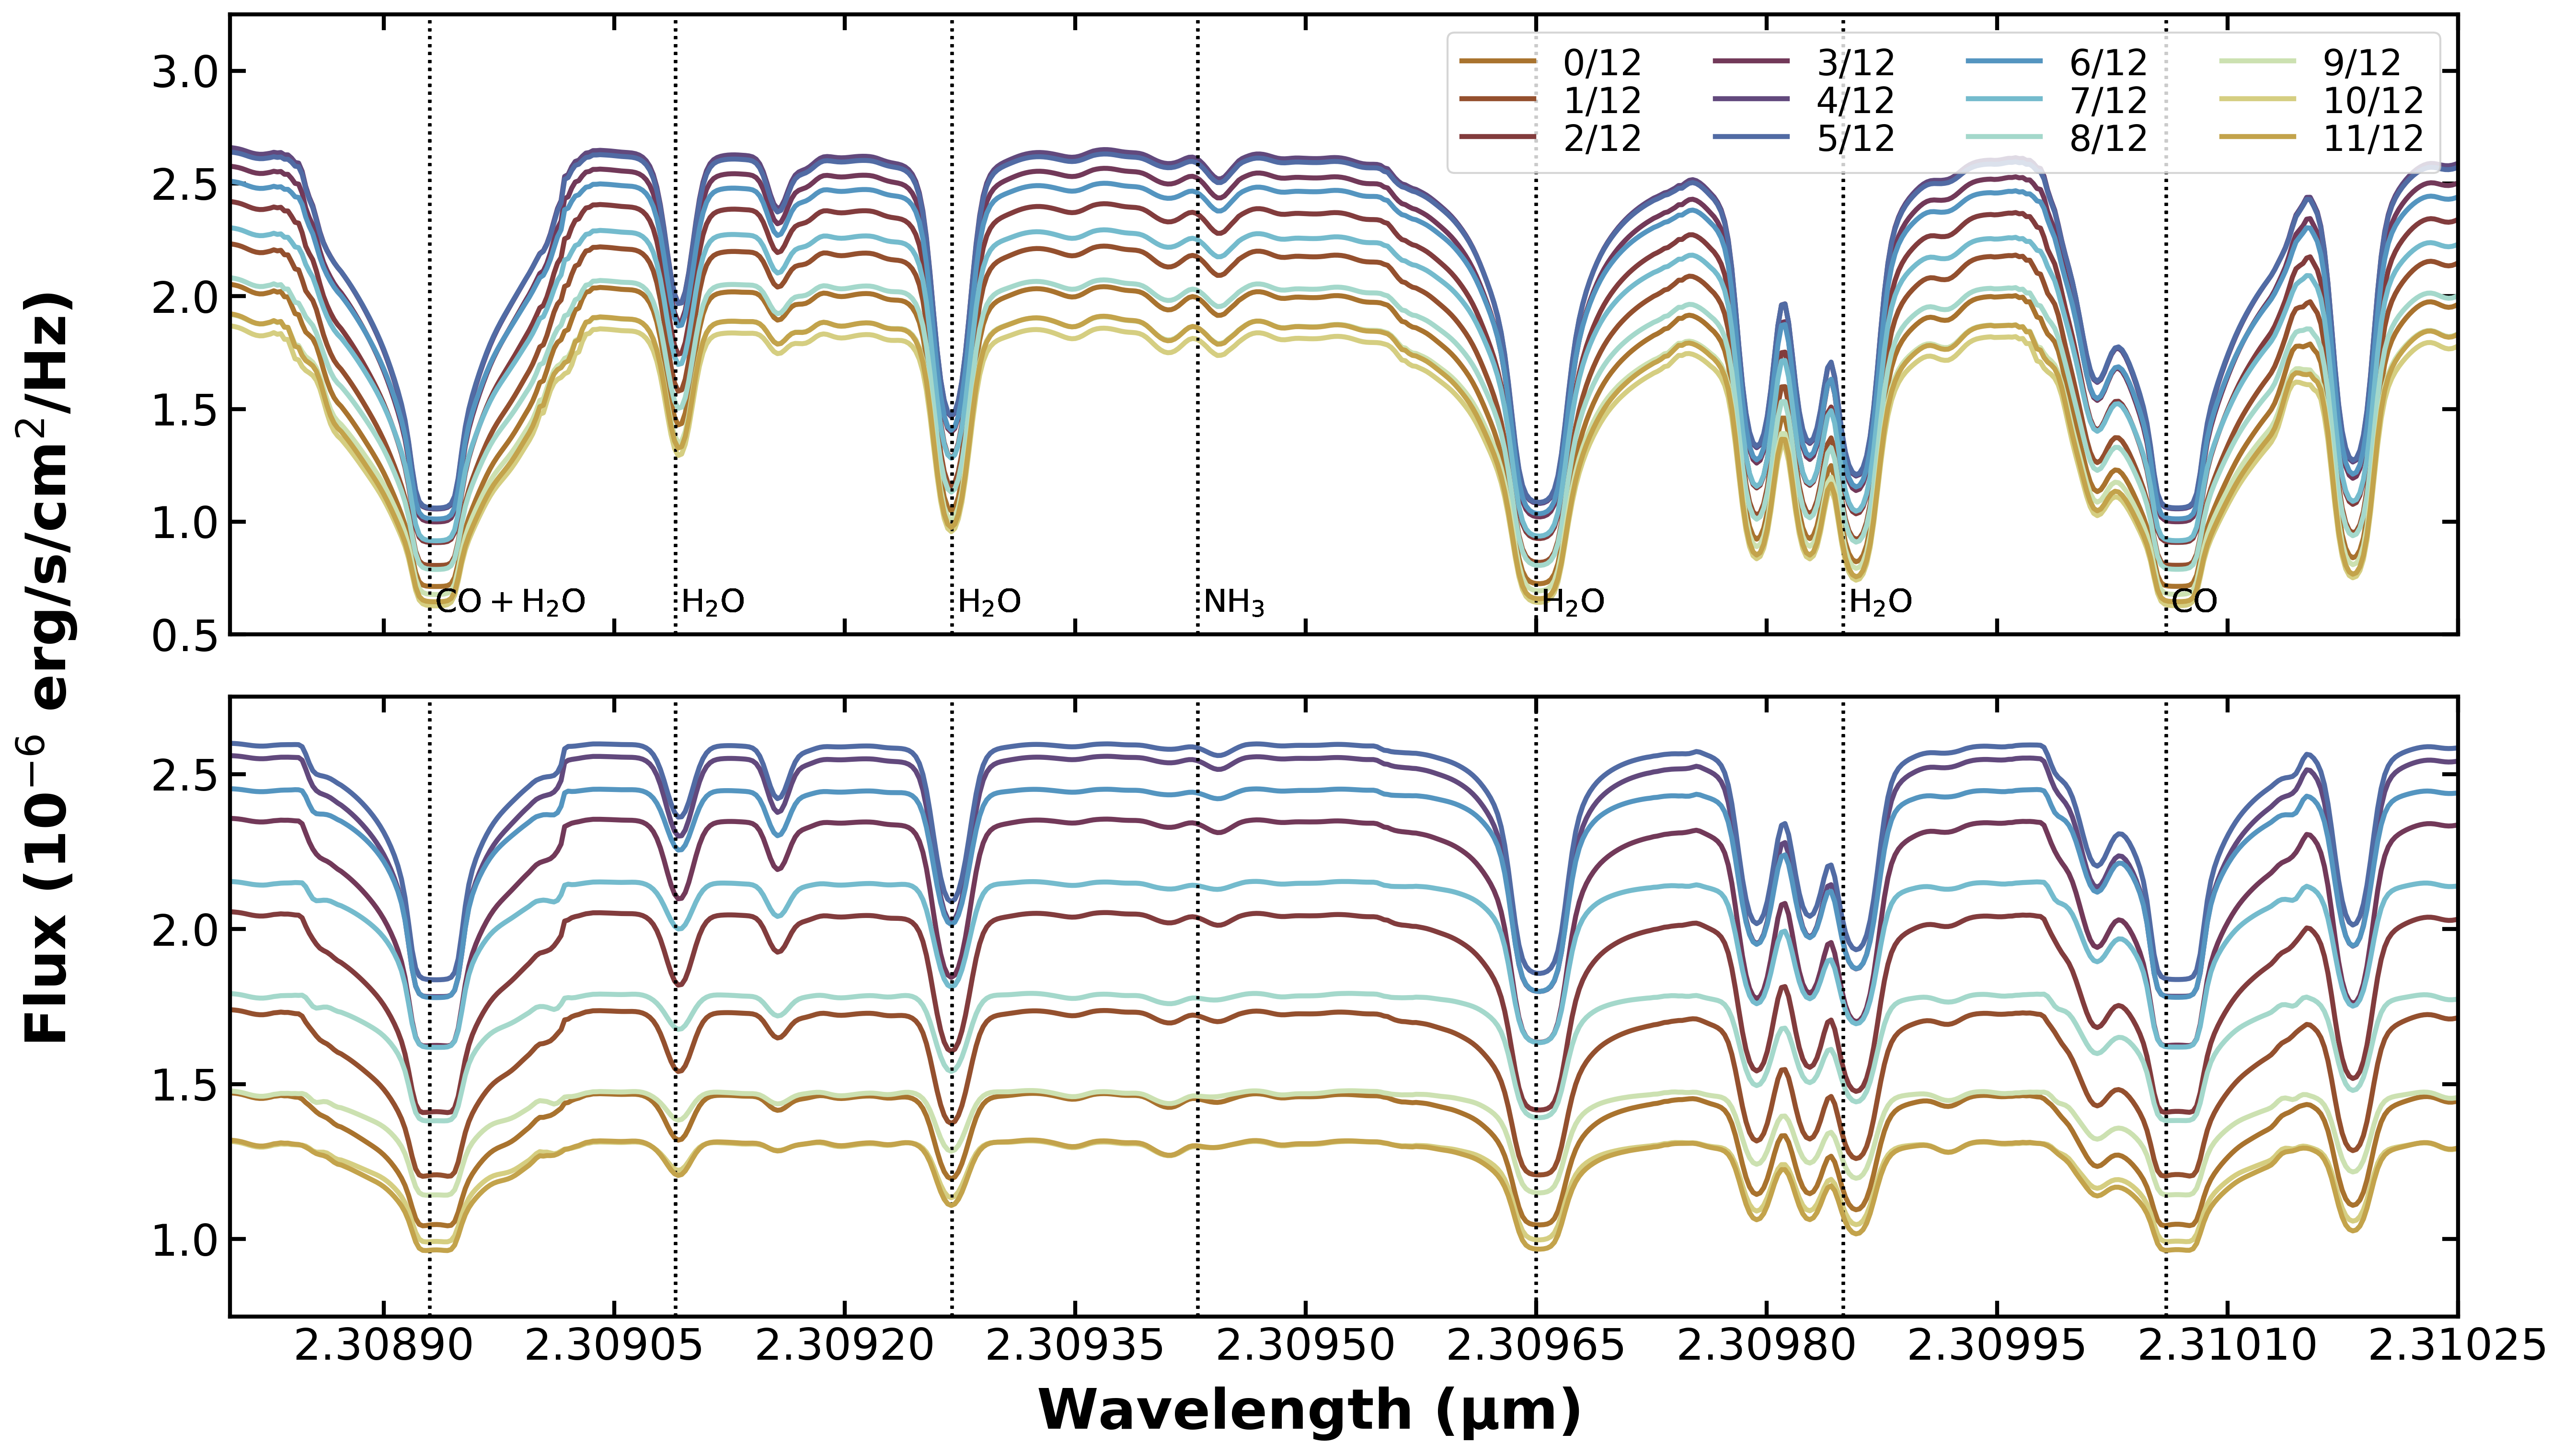

In [6]:
# Figure aesthetics
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20, 12),sharex=True, sharey=False,squeeze=True)
plt.subplots_adjust(hspace=0.1, wspace=0)


models = ['UPS-LOW-G-CLEAR-250', 'UPS-LOW-G-CLOUDY-250', 'UPS-LOW-G-EXT-CLOUDY-250']
models = ['UPS-LOW-G-CLEAR-250', 'UPS-LOW-G-CLOUDY-250']


inclinations = ['1.152']

  
files = ['/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_0.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_30.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_60.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_90.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_120.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_150.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_180.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_210.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_240.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_270.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_300.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_330.0_inc_{}000.00.dat']


labels = ['0/12', '1/12', '2/12', '3/12', '4/12', '5/12', '6/12', '7/12', '8/12', '9/12', '10/12', '11/12']


#buda, batlow, roma, 
cm_name = 'romaO'
cm_file = np.loadtxt(f'ScientificColourMaps6/{cm_name}/{cm_name}.txt')
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file[::-1])

num_lines = len(labels)
colors = np.linspace(0, 256, num_lines + 1)

j = 0
for model in models:
    for inc in inclinations:

        i = 0
        for file in files:
            data_no_doppler = file.format('0', model, inc)
            color_val = int(colors[i]) - 64
            if color_val < 0:
                color_val = color_val + 256            
            

            #values = [2.30898, 2.30903, 2.30888,  2.309388, 2.30948,
            #          2.31003, 2.31021,  2.30888,2.30882,2.30953, 2.309388, 2.309328, 2.31003, 2.31021]
            #line_labels = [r"$H_{2}O$",r"$H_{2}O$",r"$CO$", r"$CH_{4}$", r"$NH_{3}$",
            #               r"$CO$", r"$H_{2}O$", r"$CO$",r"$CO$",r"$NH_{3}$",r"$CH_{4}$",r"$CH_{4}$",
            #               r"$CO$", r"$H_{2}O$"]
            
            
            values = [2.30893, 2.30909, 2.30927, 2.30943, 2.30965, 2.30985, 2.31006]
            line_labels = [r"$\rm{CO + H_{2}O}$", r"$\rm{H_{2}O}$", r"$\rm{H_{2}O}$", 
                           r"$\rm{NH_{3}}$",r"$\rm{H_{2}O}$",
                          r"$\rm{H_{2}O}$", r"$\rm{CO}$"]

            
            for z in range(len(values)):
                ax[j].axvline(x=values[z], color='black', linestyle='dotted')
                if j == 0:
                    ax[j].text(values[z] + 0.000003, 0.6, line_labels[z], fontsize=16)

            
            spectra0 = pd.read_csv(data_no_doppler, header=None, delim_whitespace=True, names=['Wavelength','Flux'])
            ax[j].plot(spectra0['Wavelength'][10:-10] * 1e6, 1e9 * spectra0['Flux'][10:-10], linewidth=2.5,
                     linestyle='solid', color=my_colors(color_val), label=labels[i])
            
            ax[j].set_xlim([2.3088, 2.31025])
            
            
            ax[0].set_ylim([0.5, 3.25])
            ax[1].set_ylim([0.75, 2.75])
            
            if j == 0:
                ax[j].legend(fontsize=18, ncol=4,handleheight=1, labelspacing=0.05, loc='upper right')
                
            plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))               

                
            i = i + 1      
        j = j + 1


fig.text(0.5, 0.06, r"Wavelength ($\mathbf{\mu}$m)", size=28, weight='bold', ha='center')
fig.text(0.05, 0.5, r"Flux (10$^{-6}$ erg/s/cm$^2$/Hz)", size=28, weight='bold', va='center', rotation='vertical')

#plt.legend(fontsize=10, loc='upper right')
#
#
#plt.xlabel(r'Wavelength ($\mathbold{\mu m}$)', fontsize=16, weight='bold')
#ax[i].xlabel(r"Wavelength ($\mathbf{\mu m}$)", fontsize=14, weight='bold')

#ax[i].ylabel(r"Flux ($\mathbf{10^{-6} \ erg/s/cm^2/Hz}$)", fontsize=14, weight='bold')

plt.savefig('/home/imalsky/Desktop/figures/spectra-doppler-off.pdf', dpi=150, bbox_inches='tight')
#plt.clf()}

## Compare the inclination changes

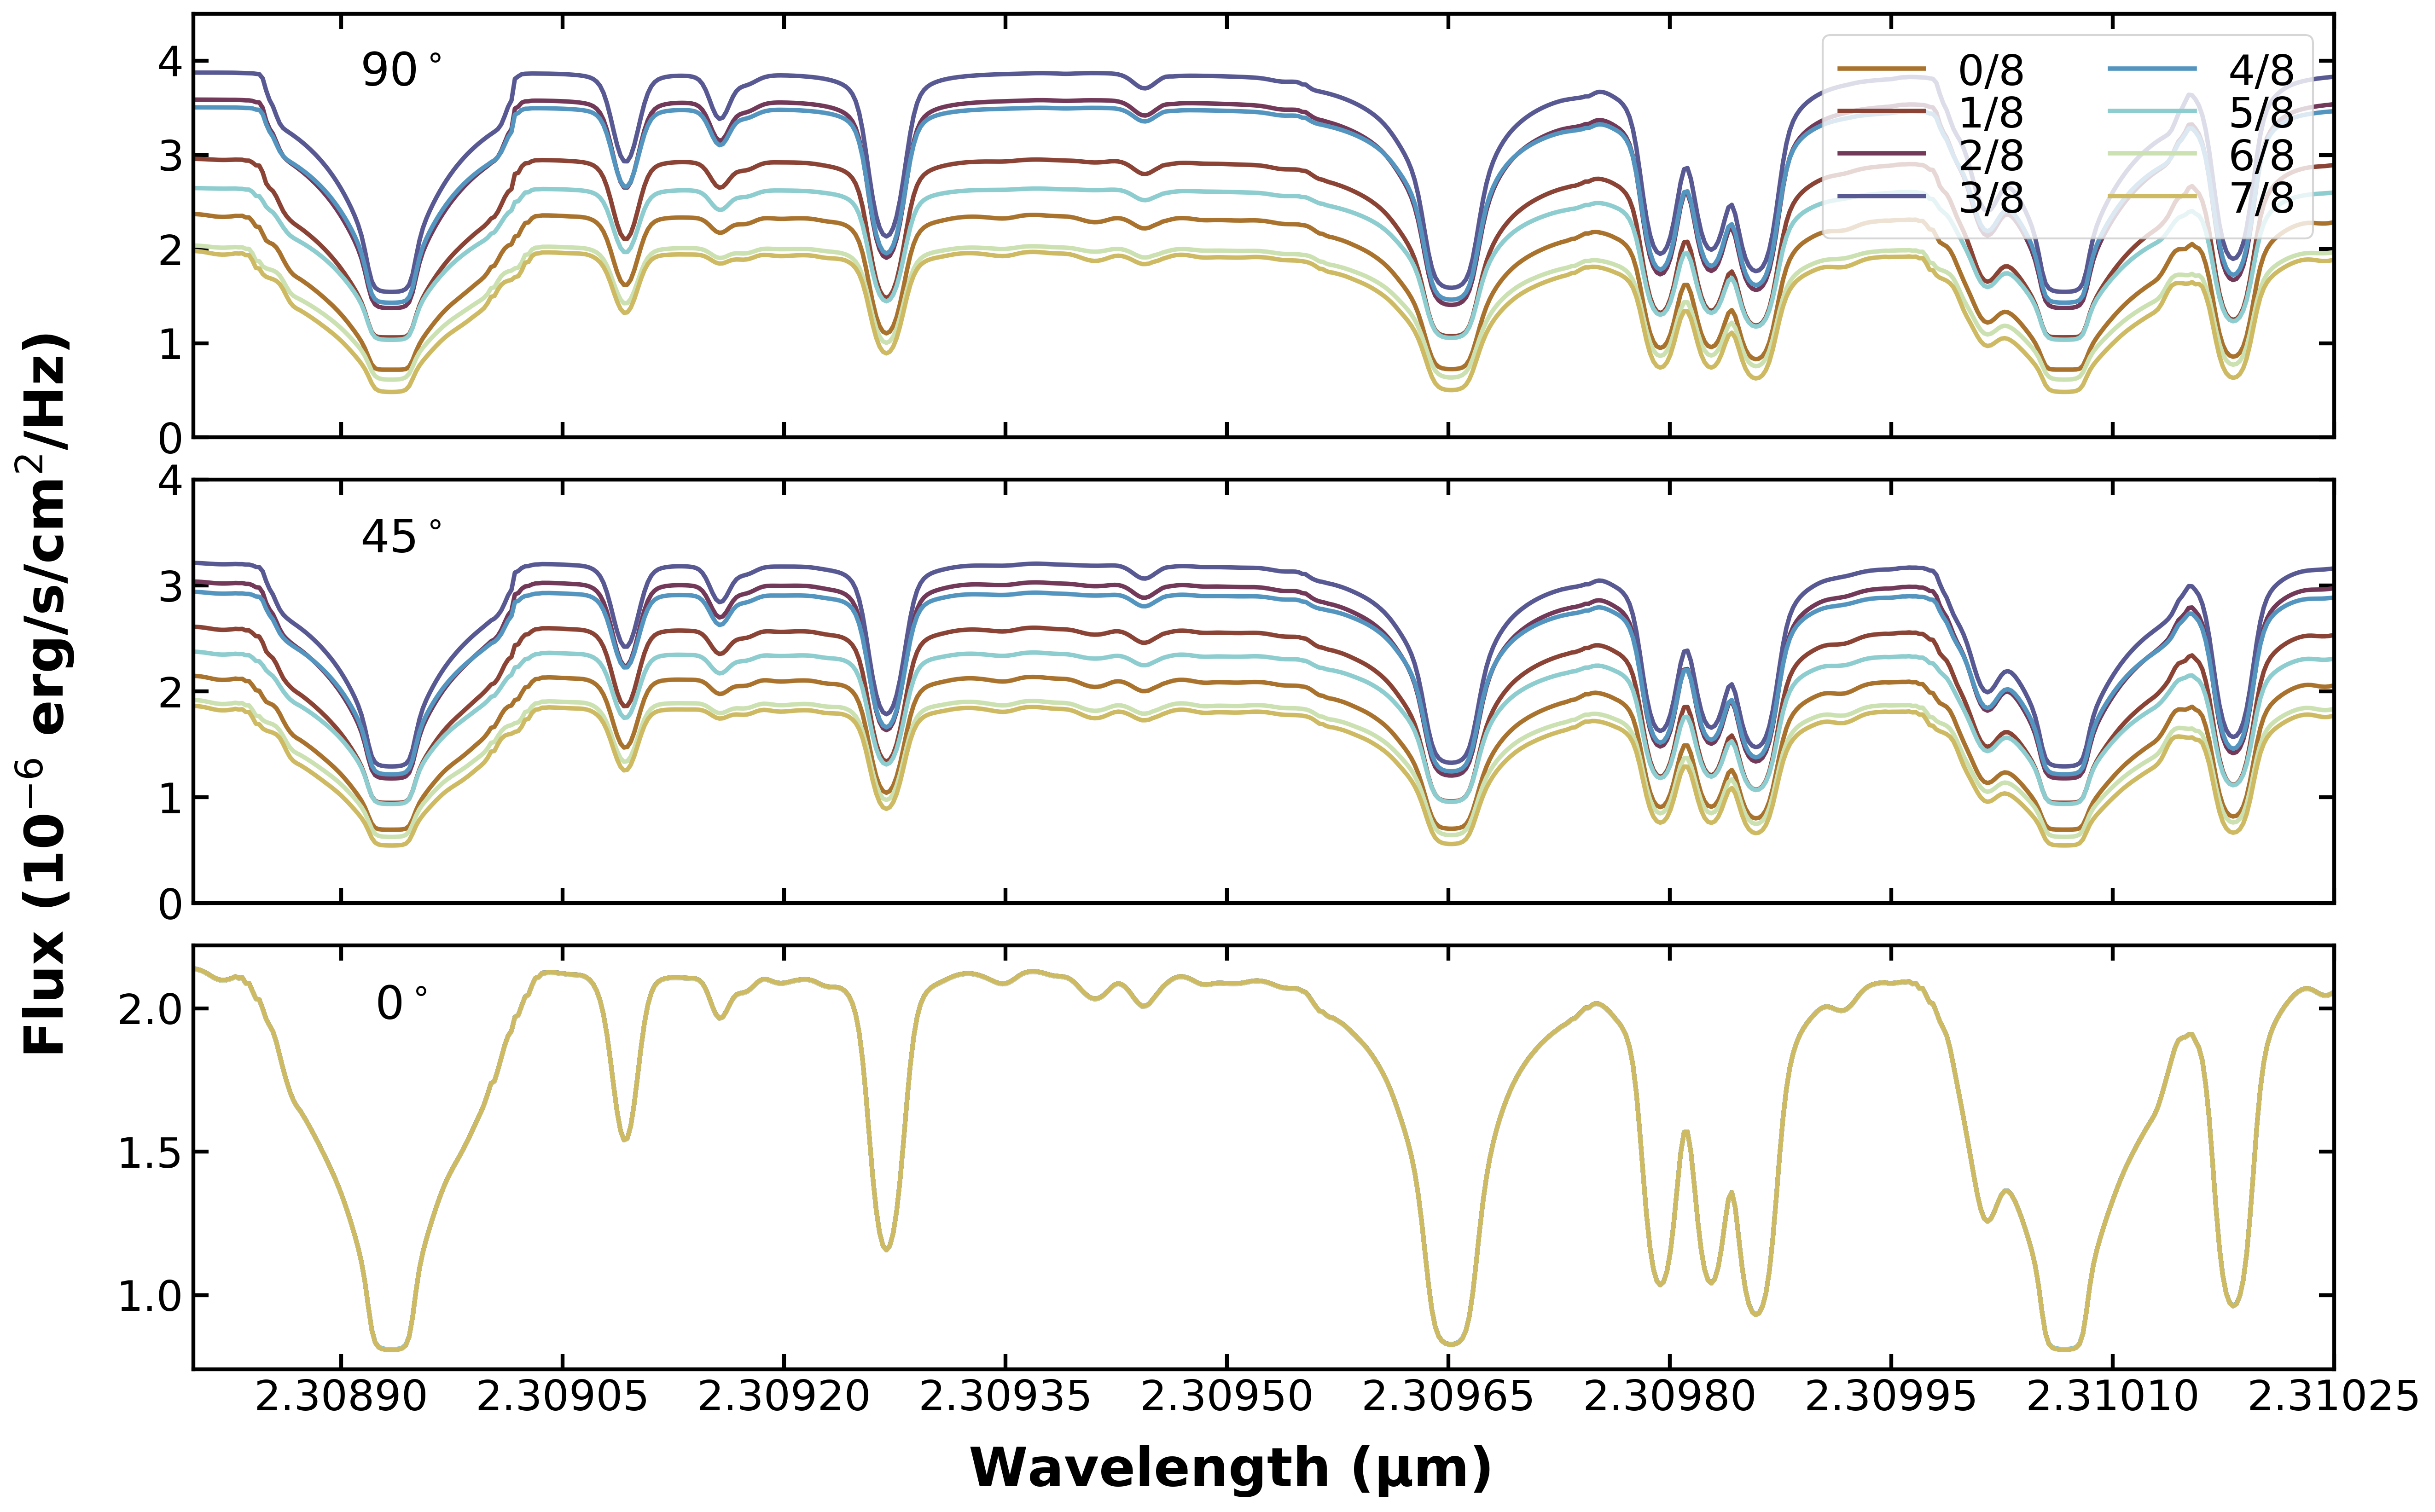

In [10]:
# Figure aesthetics
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(20, 13), sharex=True, sharey=False)
plt.subplots_adjust(hspace=0.1, wspace=0)




models = ['UPS-LOW-G-CLEAR-250', 'UPS-LOW-G-CLOUDY-250', 'UPS-LOW-G-EXT-CLOUDY-250']
models = ['UPS-LOW-G-CLEAR-250']

#inclinations = ['0.0', '0.785', '1.5708']
inclinations = ['0.0', '0.78539816', '1.57079633']
#inclinations = [''1.5708'']


  
files = ['/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_0.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_45.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_90.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_135.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_180.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_225.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_270.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_315.0_inc_{}000.00.dat']

labels = ['0/8', '1/8', '2/8', '3/8', '4/8', '5/8', '6/8', '7/8']


#buda, batlow, roma, 
cm_name = 'romaO'
cm_file = np.loadtxt(f'ScientificColourMaps6/{cm_name}/{cm_name}.txt')
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file[::-1])

num_lines = len(labels)
colors = np.linspace(0, 256, num_lines + 1)

j = 0
for model in models:
    for inc in inclinations:

        i = 0
        for file in files:
            color_val = int(colors[i]) - 64
            if color_val < 0:
                color_val = color_val + 256            
                
                
            data_no_doppler = file.format('0', model, inc)
            
            #spectra0 = pd.read_csv(data_no_doppler, header=None, sep="\s+|\t+|\s+\t+|\t+\s+", names=['Wavelength','Flux'])
            #plt.plot(spectra0['Wavelength'][10:-10] * 1e6, 1e9 * spectra0['Flux'][10:-10], linewidth=4,
            #         linestyle='solid', color='black')

            spectra0 = pd.read_csv(data_no_doppler, header=None, delim_whitespace=True, names=['Wavelength','Flux'])
            ax[j].plot(spectra0['Wavelength'][10:-10] * 1e6, 1e9 * spectra0['Flux'][10:-10], linewidth=2.3,
                     linestyle='solid', color=my_colors(color_val), label=labels[i])
            
            ax[j].set_xlim([2.3088, 2.31025])
            
            ax[0].set_ylim([0.0, 4.5])
            ax[1].set_ylim([0.0, 4.0])
            #ax[2].set_ylim([1.25, 1.45])
            
            ax[0].set_yticks([0.0, 1.0, 2.0, 3.0, 4.0])
            ax[1].set_yticks([0.0, 1.0, 2.0, 3.0, 4.0])
            #ax[2].set_yticks([1.25, 1.30, 1.35, 1.40, 1.45])
            


            if j == 0:
                ax[j].legend(fontsize=22, ncol=2, handleheight=1, labelspacing=0.01, loc='upper right')
            i = i + 1
            
            plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))               
                            
            
        j = j + 1

fig.text(0.2, 0.84, r"90$^\circ$", size=24, weight='normal', ha='center')
fig.text(0.2, 0.58, r"45$^\circ$", size=24, weight='normal', ha='center')
fig.text(0.2, 0.32, r"0$^\circ$", size=24, weight='normal', ha='center')


fig.text(0.5, 0.06, r"Wavelength ($\mathbf{\mu m}$)", size=28, weight='bold', ha='center')
fig.text(0.06, 0.5, r"Flux (10$^{-6}$ erg/s/cm$^2$/Hz)", size=28, weight='bold', va='center', rotation='vertical')


plt.savefig('/home/imalsky/Desktop/figures/spectra-doppler-off-{}-{}000.00.pdf'.format(model, inc), 
            dpi=100, bbox_inches='tight')
#plt.clf()

## Compare the doppler shifted to undoppler shifted

/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:41: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
No handles with labels found to put in legend.
/home/imalsky/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:45: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
/h

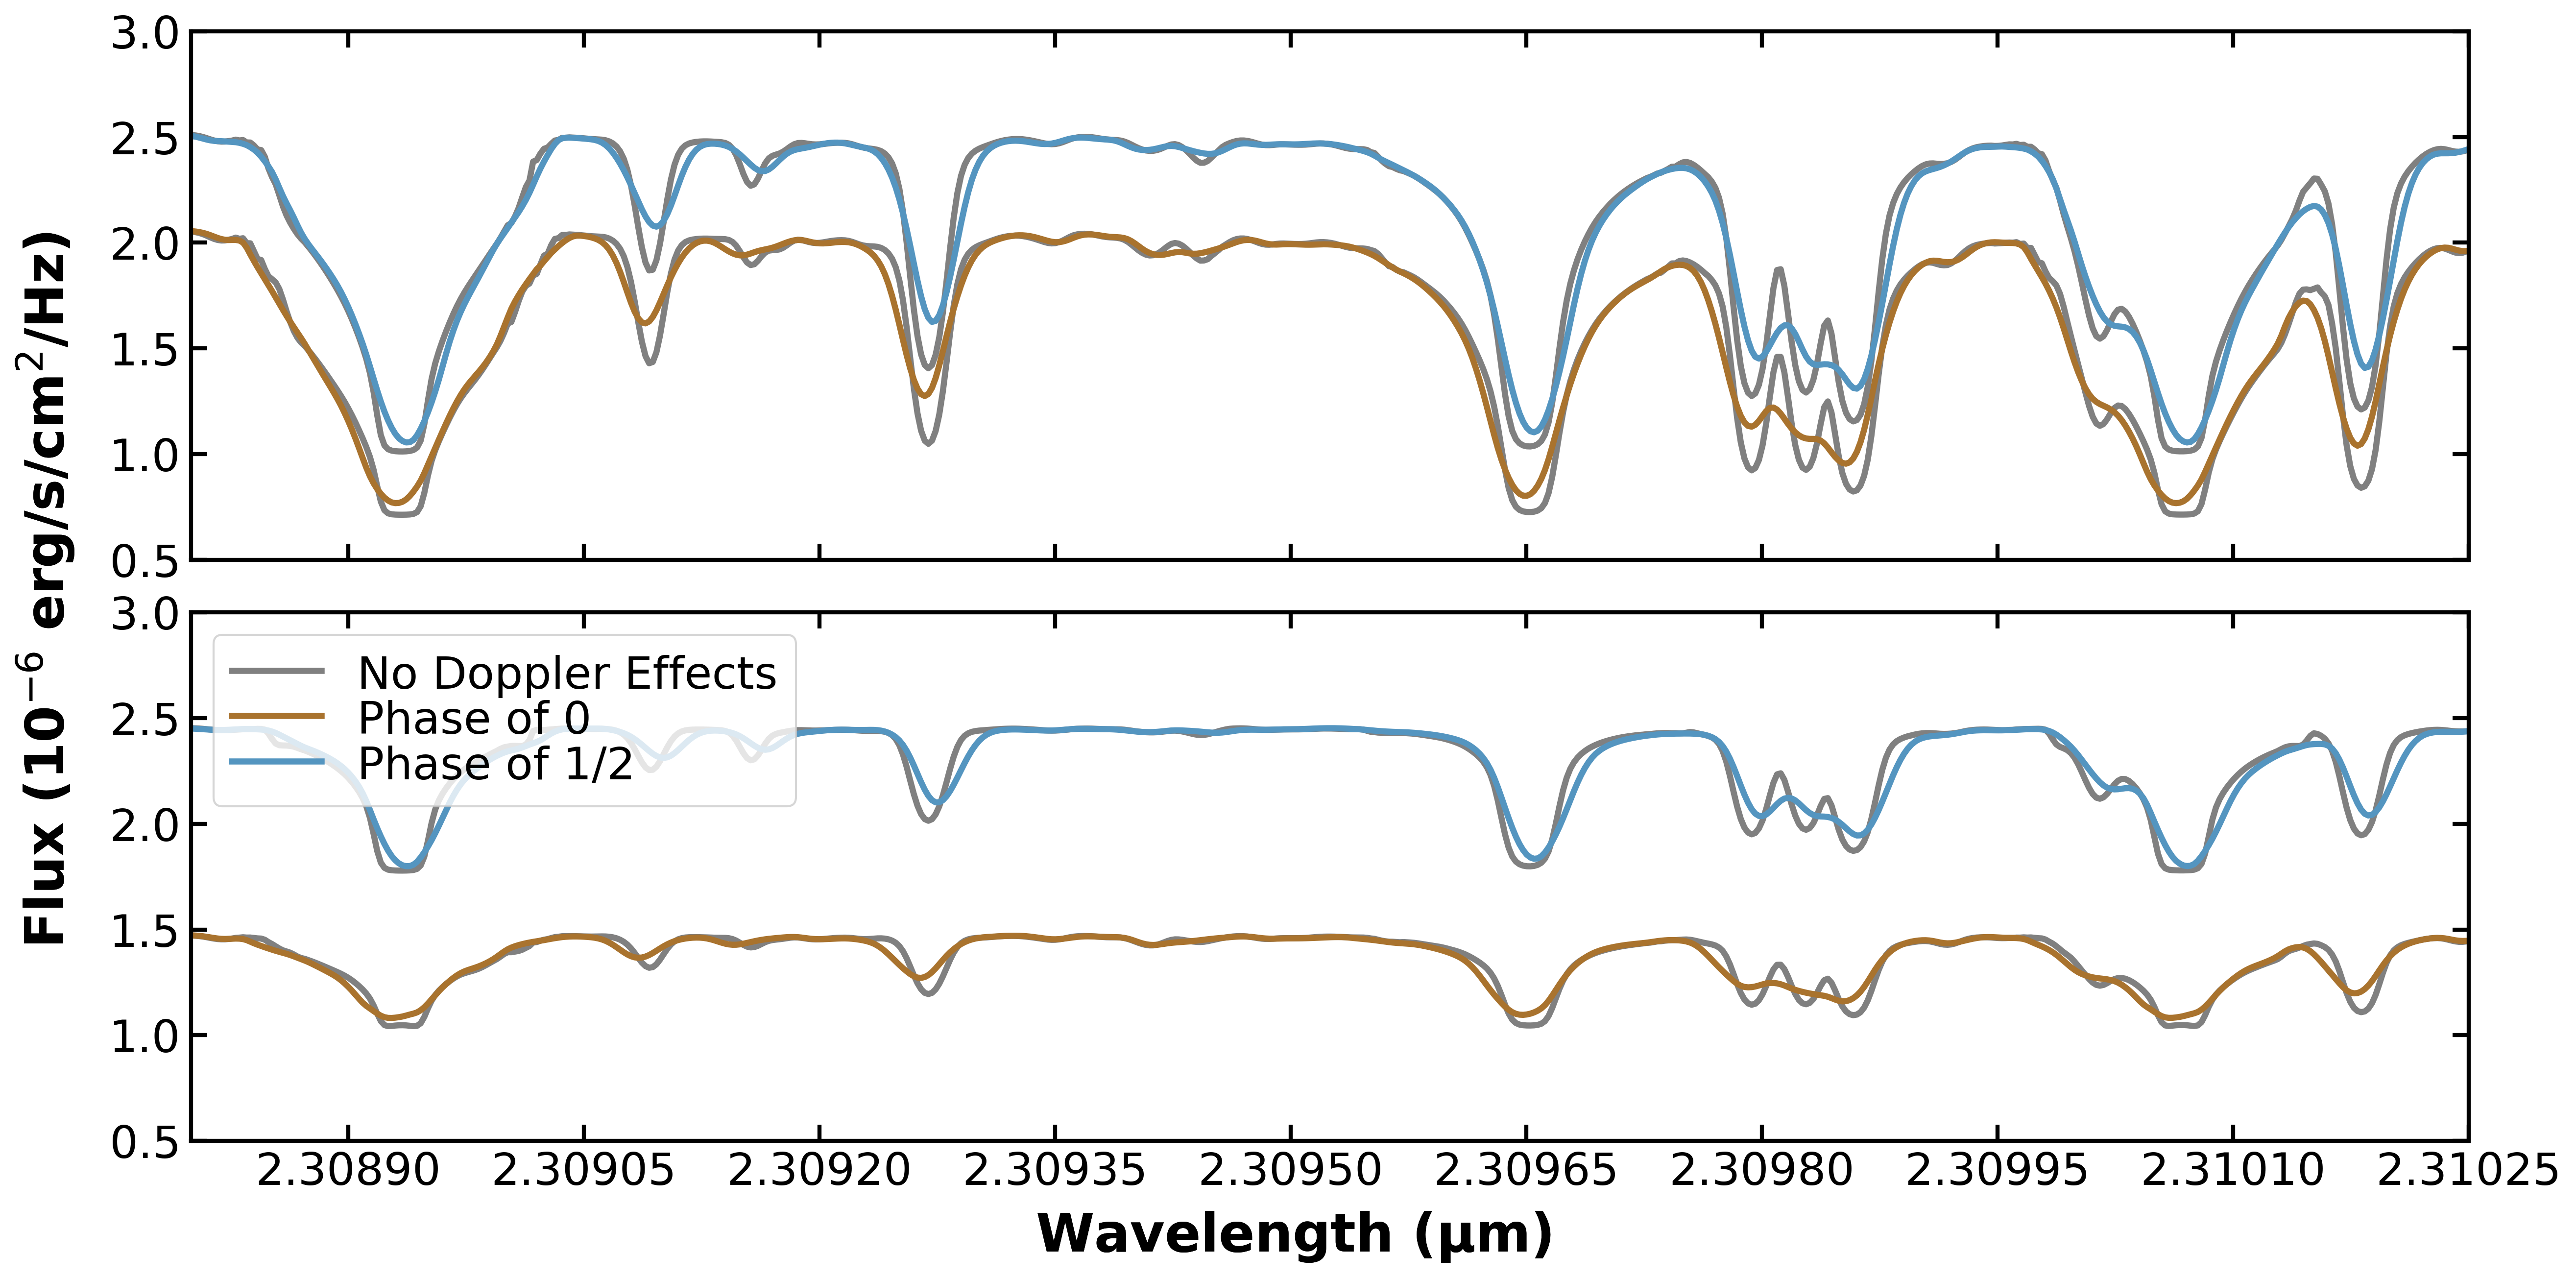

In [13]:
# Figure aesthetics
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20,10), sharex=True, sharey=False, squeeze=True)
plt.subplots_adjust(wspace=0.05, hspace=0.1)


models = ['UPS-LOW-G-CLEAR-250', 'UPS-LOW-G-COM-CLOUDY-250', 'UPS-LOW-G-EXT-CLOUDY-250']
models = ['UPS-LOW-G-CLEAR-250', 'UPS-LOW-G-CLOUDY-250']


inclinations = ['1.152']

  
files = ['/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_0.0_inc_{}000.00.dat',
         '/home/imalsky/Desktop/spectra/Spec_{}_{}_phase_180.0_inc_{}000.00.dat']


labels = ['Phase of 0','Phase of 1/2']


#buda, batlow, roma, 
cm_name = 'romaO'
cm_file = np.loadtxt(f'ScientificColourMaps6/{cm_name}/{cm_name}.txt')
my_colors = mcolors.LinearSegmentedColormap.from_list(cm_name, cm_file[::-1])

num_lines = len(labels)
colors = np.linspace(0, 256, num_lines + 1)

j = 0
for model in models:
    for inc in inclinations:

        i = 0
        for file in files:
            color_val = int(colors[i]) - 64
            if color_val < 0:
                color_val = color_val + 256            
                
            data_no_doppler = file.format('0', model, inc)
            
            if i ==0:
                spectra0 = pd.read_csv(data_no_doppler, header=None, sep="\s+|\t+|\s+\t+|\t+\s+", names=['Wavelength','Flux'])
                im = axes[j].plot(spectra0['Wavelength'][10:-10] * 1e6, 1e9 * spectra0['Flux'][10:-10], linewidth=3,
                         linestyle='solid', color='gray', label='No Doppler Effects')
            else:
                spectra0 = pd.read_csv(data_no_doppler, header=None, sep="\s+|\t+|\s+\t+|\t+\s+", names=['Wavelength','Flux'])
                im = axes[j].plot(spectra0['Wavelength'][10:-10] * 1e6, 1e9 * spectra0['Flux'][10:-10], linewidth=3,
                         linestyle='solid', color='gray')               

            data_no_doppler = file.format('1', model, inc)
            
            spectra0 = pd.read_csv(data_no_doppler, header=None, sep="\s+|\t+|\s+\t+|\t+\s+", names=['Wavelength','Flux'])
            im = axes[j].plot(spectra0['Wavelength'][10:-10] * 1e6, 1e9 * spectra0['Flux'][10:-10], linewidth=3,
                     linestyle='solid', color=my_colors(color_val), label=labels[i])

            axes[1].legend(fontsize=22, ncol=1, handleheight=1, labelspacing=0.01, loc='upper left')
            axes[0].set_ylim([0.5, 3.0])
            axes[1].set_ylim([0.5, 3.0])
            
            plt.gca().xaxis.set_major_locator(MaxNLocator(prune='lower'))               
            
            i = i + 1
        

        #plt.legend()
        #axes[j].set_ylim([0., 2.75])
        axes[j].set_xlim([2.3088, 2.31025])
           

        fig.text(0.5, 0.05, r"Wavelength ($\mathbf{\mu m}$)", size=26, weight='bold', ha='center')
        fig.text(0.065, 0.5, r"Flux (10$^{-6}$ erg/s/cm$^2$/Hz)", size=26, weight='bold', va='center', rotation='vertical')
        
        j=j+1
        #plt.ylabel(r"Flux ($\mathbf{10^{-6} \ erg/s/cm^2/Hz}$)", fontsize=20, weight='bold')

plt.savefig('/home/imalsky/Desktop/figures/doppler-compare.pdf', dpi=100, bbox_inches='tight')
